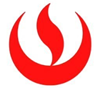

<h3 align="center">Inteligencia Artificial - WS7A</h3>

# Detección de fraude mediante el Mapa de Autoorganización - SOM

Fuente de Datos: https://www.kaggle.com/ujjwal9/credit-card-applications


Según un informe reciente publicado por **Markets & Markets**, el mercado de detección y prevención de fraudes tendrá un valor de 33,19 mil millones de dólares para 2021. Esta es una industria enorme y la demanda de habilidades avanzadas de aprendizaje profundo solo va a crecer.

El desafío empresarial aquí consiste en detectar el fraude en las aplicaciones de tarjetas de crédito. Crearemos un **modelo de aprendizaje profundo** para un banco y obtendremos un conjunto de datos que contiene información sobre los clientes que solicitan una tarjeta de crédito avanzada.


### OBJETIVO

Detectar posibles fraudes dentro de las solicitudes para aplicar a una tarjeta de crédito avanzada, presentando al final una lista explícita de aquellos clientes que potencialmente engañaron con sus datos.

#### Parte 1: Preprocesamiento de datos

En primer lugar, importamos la librería **numpy** utilizada para la matriz multidimensional, luego importamos la librería **pandas** utilizada para importar el conjunto de datos y, por último, importamos la librería **matplotlib** utilizada para trazar el gráfico.

In [1]:
# importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Descripción del Conjunto de Datos

Los datos se encuentran contenidos en el archivo **Credit_Card_applications.csv**.  Este archivo se refiere a datos suministrados en aplicaciones (formularios) para la obtención de tarjetas de crédito. Todos los nombres y valores de los atributos se han cambiado a símbolos sin sentido para proteger la confidencialidad de los datos.
Está compuesto por 690 observaciones y 16 columnas o atributos.

In [2]:
# obtener el conjunto de datos
dataset = pd.read_csv('Credit_Card_applications.csv')

#### (a) Descripción de los atributos

Este conjunto de datos es interesante porque hay una buena combinación de atributos: continuo, nominal con un número reducido de valores y nominal con un número mayor de valores. También hay algunos valores perdidos.

In [3]:
# Informacion de los atributos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [4]:
# Una muestra del conjunto de datos
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


Existen 6 atributos numéricos y 8 categóricos. Las etiquetas se han cambiado para la conveniencia de los algoritmos estadísticos. Por ejemplo, el atributo A4 originalmente tenía 3 etiquetas p, g, gg y estas se han cambiado a etiquetas 1,2,3.

#### (b) Tipos de datos

**CustomerID:** continuo

**A1:** 0,1 CATEGORICO (antes: a, b)

**A2:** continuo.

**A3:** continuo.

**A4:** 1,2,3 CATEGORICO (anteriormente: p, g, gg)

**A5:** 1, 2,3,4,5,6,7,8,9,10,11,12,13,14 CATEGORICO (anteriormente: ff, d, i, k, j, aa, m, c, w, e, q, r, cc, x)

**A6:** 1, 2,3, 4,5,6,7,8,9 CATEGORICAL (anteriormente : ff, dd, j, bb, v, n, o, h, z)

**A7:** continuo.

**A8:** 1, 0 CATEGORICAL (antes: t, f)

**A9:** 1, 0 CATEGORICAL (antes: t, f)

**A10:** continuo.

**A11:** 1, 0 CATEGORICAL (antes t, f)

**A12:** 1, 2, 3 CATEGORICO (antes: s, g, p)

**A13:** continuo.

**A14:** continuo.

**A15:** atributo de clase 1,2 (anteriormente: +, -)

Después de importar el conjunto de datos, definimos nuestra variable dependiente e independiente. Nuestras variables independientes son de 1 a 12 atributos, como puede ver en el conjunto de datos de muestra que llamamos **'X'** y la variable dependiente es el último atributo al que llamamos **'y'**.

**Nota:** construiremos el modelo de SOM, que es aprendizaje profundo no supervisado, por lo que estamos trabajando con variables independientes.

In [5]:
# Definicion de variable dependiente e independientes
X = dataset.iloc [: ,:-1].values    # variables independientes
y = dataset.iloc [: , -1].values    # variable dependiente

In [6]:
print("Variables dependientes X: ", X)

Variables dependientes X:  [[1.5776156e+07 1.0000000e+00 2.2080000e+01 ... 2.0000000e+00
  1.0000000e+02 1.2130000e+03]
 [1.5739548e+07 0.0000000e+00 2.2670000e+01 ... 2.0000000e+00
  1.6000000e+02 1.0000000e+00]
 [1.5662854e+07 0.0000000e+00 2.9580000e+01 ... 2.0000000e+00
  2.8000000e+02 1.0000000e+00]
 ...
 [1.5675450e+07 0.0000000e+00 1.8830000e+01 ... 2.0000000e+00
  1.0000000e+02 1.0000000e+00]
 [1.5776494e+07 0.0000000e+00 2.7420000e+01 ... 2.0000000e+00
  1.2000000e+02 1.2000000e+01]
 [1.5592412e+07 1.0000000e+00 4.1000000e+01 ... 1.0000000e+00
  5.6000000e+02 1.0000000e+00]]


In [7]:
print("Variable dependientes y: ", y)

Variable dependientes y:  [0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1
 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0
 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0
 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1
 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0
 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0
 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0
 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1
 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1
 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1
 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1
 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1

#### (c) Escala de funciones

El escalado de características es la parte más importante del preprocesamiento de datos. Si vemos nuestro conjunto de datos, entonces algún atributo contiene información en valor numérico, algunos valores son muy altos y algunos son muy bajos si vemos la edad y el salario estimado. Esto causará algunos problemas en nuestro modelo de maquinaria para resolver ese problema. Establecemos todos los valores en la misma escala. Hay dos métodos para resolver ese problema, el primero es **Normalizar** y el segundo es **Escalador estándar**.

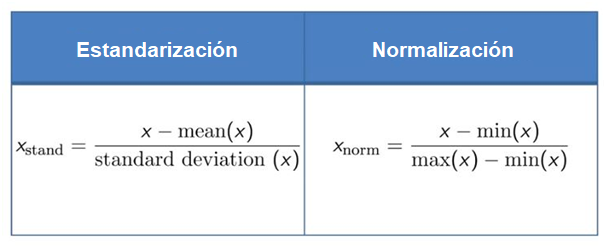

Aquí utilizamos la **Normalización**, importamos la librería **MinMaxScaler** desde Sklearn.

In [8]:
# Escalar las variables independientes entre 0 y 1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)
print("Variables dependientes X: ", X)

Variables dependientes X:  [[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]


#### Parte 2: Construyendo el modelo SOM

En esta parte, crearemos el modelo de mapas autoorganizados.

Utilizaremos el **modelo MiniSom**, el cual deberemos instalar desde pypi.org (pip install MiniSom )

In [10]:
# importar el modelo SOM - Si es la primera vez, instalarlo con pip install MiniSom 
from minisom import MiniSom

#### (a) Inicializar el modelo

En este paso, inicializamos nuestro modelo SOM y pasamos varios parámetros: 

* Los dos primeros son la dimensión de nuestro mapa SOM aquí x = 10 & y = 10 significa que tomamos una cuadrícula de 10 por 10.

* El tercer parámetro es la longitud de entrada, tenemos 15 atributos diferentes en nuestras columnas de conjunto de datos, por lo que input_lenght = 15. 

* El cuarto parámetro es sigma, que es el radio de un vecindario diferente en la cuadrícula, por lo que mantendremos 1.0 (que es el valor predeterminado para los SOM). 

* Y los últimos parámetros pasados son la **tasa de aprendizaje**, que es un hiperparámetro, el tamaño de la cantidad de peso que se actualiza durante cada iteración, por lo que cuanto más alta es la tasa de aprendizaje, más rápida es la conversión y mantenemos el valor predeterminado que es 0.5.

In [11]:
# Inicializar el modelo
som = MiniSom( x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

#### (b) Inicializar los pesos

En este paso, inicializamos aleatoriamente nuestras ponderaciones mediante el uso de nuestro modelo SOM inicializado (en la variable som) y pasamos solo un parámetro aquí, el cual es nuestro vector de entrada **X** (las variables independientes del conjunto de datos).

In [12]:
# Inicializar los pesos
som.random_weights_init(X)

#### (c) Entrenar el modelo

En este paso entrenamos nuestro modelo. Aquí pasamos dos argumentos:

* Primero son nuestros datos o el vector de entrada X y 

* El segundo es el número de iteraciones (epocas), que en nuestro caso elegimos 100.

In [13]:
# Entrenar el modelo
som.train_random(data = X, num_iteration = 100)

#### Parte 3: Visualizando el resultado

En este paso, construimos una visualización del mapa autoorganizado. En primer lugar importamos la librería **pylab** que se utiliza para la visualización de nuestro resultado y desde esta importamos diferentes paquetes. 

* La instrucción bone() está creando una ventana y luego en la tercera línea de código, con pcolor() tomamos la media de todos los nodos ganadores. 

* Luego con colorbar() creamos una barra de color cuyo valor esté entre 0 y 1. 

* Con la instrucción markers (marcadorores), tomamos un círculo de color rojo que significa que el cliente no obtuvo la aprobación y un cuadrado de color verde que identifica qué cliente si obtiene la aprobación.

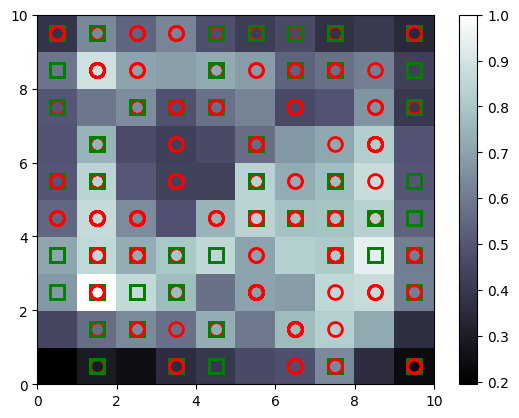

In [14]:
# Hacer un mapa de autoorganización
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o' , 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

Aquí está nuestro **mapa autoorganizado**, el círculo rojo significa que el cliente no obtuvo la aprobación y el cuadrado verde significa que el cliente sí obtuvo la aprobación. 

Y si observamos nuestro valor atípico, entonces el área de color blanco es un fraude de alto potencial. 

En la siguiente parte (Parte 4), capturaremos al tramposo (podremos verlo tanto en rojo como en verde).

#### Parte 4: Detectar el posible fraude

En esta parte, detectamos el posible fraude del cliente del mapa autoorganizado que visualizamos arriba.

#### (a) Mapeo del nodo ganador

En este paso, mapeamos todos los nodos ganadores de clientes del Mapa autoorganizado.

In [15]:
# Mapeo del nodo ganador
mappings = som.win_map(X)

#### (b) Atrapar al tramposo

En este paso detectamos el fraude tomando solo a aquellos clientes que puedan hacer trampa si vemos en nuestro SOM y luego vemos claramente que el mapeo [(7, 1), (3, 1) y (5, 1)] son **potenciales engaños** y usamos concatenate() para concatenar estos tres valores de mapeo para ponerlos en la misma lista.

In [16]:
# atrapar al tramposo
fraudes = np.concatenate((mappings[(7,1)], mappings[(3,2)], mappings[(5,4)] ), axis=0)

#### (c) Cambiar la escala del valor

En este paso, convertimos nuestro valor de escala (entre 0 y 1) en la escala original. Para hacer eso usamos la función inversa.

In [17]:
# cambiar la escala del valor usando la función inversa
fraudes = sc.inverse_transform(fraudes)

Finalmente, llamamos a la variable fraudes y obtendremos la lista completa de los clientes que podrían engañar al banco.

In [18]:
# Mostramos es ID de los clientes que podrian engañar al banco
#len(fraudes)
fraudes[:,0]

array([15651460., 15585855., 15799785., 15591360., 15649183., 15589881.,
       15602456., 15580579., 15568819., 15668679., 15636521., 15567834.,
       15608804., 15631267., 15611189.])